# Finite Difference Methods in Option Pricing

## Introduction

The **Finite Difference (FD)** method is a powerful numerical technique for solving **partial differential equations (PDEs)**. In financial engineering, it is widely used to approximate solutions to the **Black–Scholes PDE**, which governs the evolution of option prices under certain assumptions.

The FD approach replaces continuous derivatives in the Black–Scholes PDE with discrete approximations over a grid of stock prices and time steps. This transforms the continuous PDE into a system of linear equations that can be solved iteratively to obtain option values.

---

## Relevance in Option Pricing

The **Black–Scholes model** provides a closed-form analytical solution for European call and put options under the assumptions of:
- constant volatility and interest rate,
- frictionless markets,
- continuous trading,
- and lognormally distributed asset prices.

However, real-world options often **violate these assumptions**. Finite difference schemes provide a **flexible framework** that can handle:
- **Complex payoffs** (barriers, Asians, Americans),
- **Variable volatility** (local or stochastic),
- **Changing interest rates**, and
- **Early exercise features** (e.g., American options).

Thus, while the Black–Scholes formula gives a fast and elegant analytic result, finite difference solvers allow practitioners to **simulate and price derivatives** under more realistic market conditions.

---

## Advantages of Finite Difference over Black–Scholes

| Aspect | Black–Scholes (Analytical) | Finite Difference (Numerical) |
|--------|----------------------------|-------------------------------|
| **Payoff types** | European only (no early exercise) | Handles American, barrier, path-dependent payoffs |
| **Volatility** | Assumes constant σ | Can model variable σ or surface volatility |
| **Interest rates** | Constant | Time-varying or stochastic rates possible |
| **Boundary conditions** | Implicit in formula | Explicitly controlled (customizable) |
| **Computational cost** | Very low | Higher, but flexible |
| **Model flexibility** | Low | High |

Finite Difference schemes, such as **Crank–Nicolson** (used here), strike a good balance between **stability**, **accuracy**, and **computational efficiency**.

---

## Purpose of the Code

The provided Python code implements a **Crank–Nicolson Finite Difference solver** for pricing **European call and put options**, and then compares the numerical results against **Black–Scholes analytical prices**.

### Key objectives:
1. **Implement** a stable and accurate finite difference method (Crank–Nicolson with Rannacher smoothing).
2. **Validate** the finite difference results against Black–Scholes (BSM) benchmark prices.
3. **Study convergence** by varying the number of grid points in time (`N`) and space (`M`).
4. **Visualize and analyze** error convergence on log–log plots.
5. **Automate** analysis for multiple NSE tickers using live/fallback data from NSE and Yahoo Finance.

---

## What the Code Does

### 1. **Setup and Parameters**
Defines constants such as:
- risk-free rate,
- number of trading days,
- grid resolutions (`M`, `N` pairs),
- and output directories.

### 2. **Black–Scholes Helpers**
Provides analytical functions:
- `bs_price()` for call/put prices,
- `implied_volatility()` using Brent’s root finder,
- and d₁/d₂ computations.

### 3. **Crank–Nicolson Finite Difference Solver**
The function `crank_nicolson_european()`:
- Discretizes the Black–Scholes PDE into finite difference form.
- Marches **backward in time** from maturity to the present.
- Applies **Rannacher smoothing** for better stability near payoff discontinuities.
- Returns interpolated price at current spot `S₀`.

### 4. **Data Fetching**
Fetches live option data via:
- `nsepython` (for NSE option chains and spot prices),
- with fallback to `yfinance` for historical spot and volatility if needed.

### 5. **Analysis Workflow**
The function `analyze_ticker()`:
- Calibrates implied/historical volatility.
- Runs both FD and BSM pricing for multiple strikes.
- Compares errors across grid resolutions (`M`, `N`).
- Computes empirical convergence order.
- Saves results (CSVs, plots, and summaries).

### 6. **Batch Execution**
The `run_batch()` function:
- Loops over a list of NSE tickers (e.g., `["RELIANCE", "TCS", "M&M"]`).
- Generates outputs (tables, error plots) for each.

### 7. **Outputs**
For each ticker:
- CSVs of **FD vs BSM prices** and **error summaries**,
- PNG plots showing **log–log convergence**,
- Text summaries detailing empirical convergence order and interpretation.

---

## Example Outputs
- **Tables:** FD and BSM prices for multiple strikes.
- **Plots:** Mean absolute error vs grid size (log–log scale).
- **Summaries:** Numerical convergence and interpretation.

---

### In Summary
The notebook demonstrates how **finite difference methods** can be used to **numerically solve the Black–Scholes PDE**, validate the results, and extend pricing capabilities beyond analytical limits — making it an essential tool in modern **quantitative finance** and **derivative pricing**.


In [ ]:
!pip install nsepython --quiet


=== M&M === Fetching chain & spot ...


/tmp/ipython-input-2201937074.py:224: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(yf_ticker, period="1mo", progress=False)
/tmp/ipython-input-2201937074.py:227: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  spot = float(hist["Close"].iloc[-1])
/tmp/ipython-input-2201937074.py:438: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol + ".NS", period="6mo", progress=False)
/tmp/ipython-input-2201937074.py:441: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hist_vol = float(logret.std() * math.sqrt(TRADING_DAYS))


Source: yahoo | Spot: 3625.00 | Expiry: 2025-11-25 (30 days) | ATM: 3600
Calibrated vols -> call σ: 0.2475 | put σ: 0.2475

=== M&M CALL Summary ===
 strike    bsm    FD_M100_N100  err_M100  FD_M200_N200  err_M200  FD_M400_N400  err_M400  FD_M800_N800  err_M800
  3550  178.3970    168.0119     10.3851    144.3220     34.0750    107.6156     70.7815     62.2278    116.1693
  3600  149.5734    140.9900      8.5834    121.8481     27.7254     91.0557     58.5178     52.8747     96.6987
  3650  123.9399    117.6030      6.3369    101.8011     22.1388     76.2398     47.7000     44.4312     79.5086

Convergence Summary:
   grid    mean_abs_err  max_abs_err
M100_N100    8.435151     10.385141 
M200_N200   27.979725     34.075043 
M400_N400   58.999769     70.781485 
M800_N800   97.458866    116.169261 

Empirical convergence order (ATM): -1.1559
----------------------------------------------------------------------


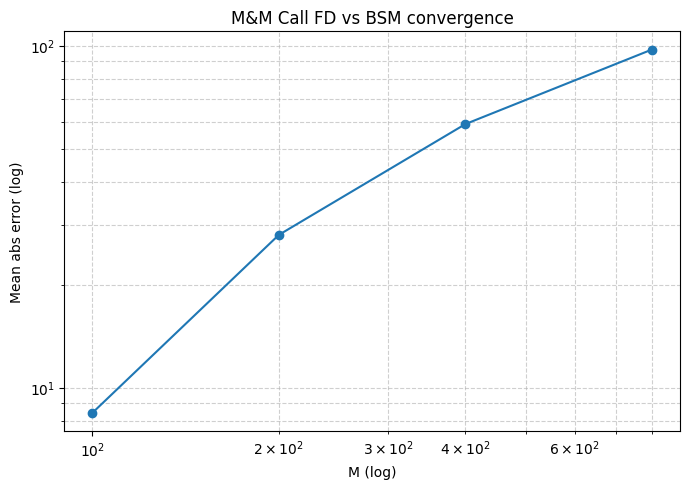


=== M&M PUT Summary ===
 strike    bsm    FD_M100_N100  err_M100  FD_M200_N200  err_M200  FD_M400_N400  err_M400  FD_M800_N800  err_M800
  3550   78.1303     58.9743     19.1560     49.8295     28.3007     36.1391     41.9911     19.2548     58.8754
  3600   98.9508     74.5264     24.4243     63.7065     35.2443     46.2526     52.6981     24.6819     74.2689
  3650  122.9613     93.7148     29.2465     80.0511     42.9102     58.1914     64.7700     31.1562     91.8051

Convergence Summary:
   grid    mean_abs_err  max_abs_err
M100_N100   24.275609    29.246543  
M200_N200   35.485088    42.910249  
M400_N400   53.153078    64.769962  
M800_N800   74.983138    91.805094  

Empirical convergence order (ATM): -0.5394
----------------------------------------------------------------------


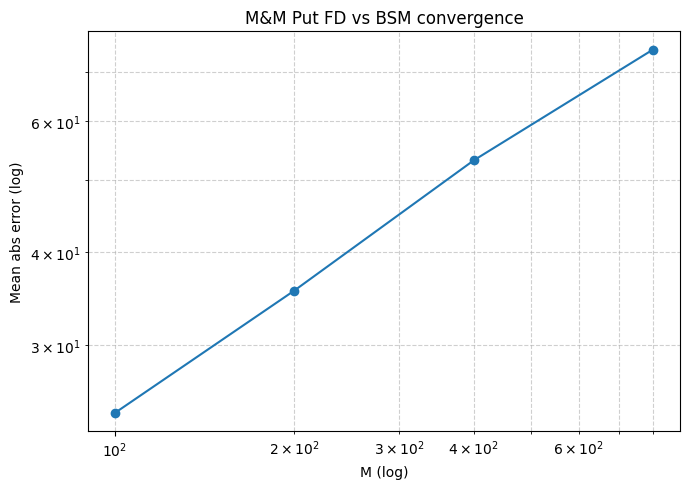

Outputs saved to /content/output_fd_nse/M&M
Batch finished.


In [ ]:
# Batch FD vs BSM analysis for NSE tickers (Colab-ready)
# Dependencies: nsepython, yfinance, scipy, pandas, numpy, matplotlib
# Place this in a Colab cell (after pip installs above) and run.

import os
import math
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.optimize import brentq
from nsepython import nse_optionchain_scrapper, nse_eq
import yfinance as yf

# ---------------- CONFIG ----------------
RISK_FREE_RATE = 0.06
TRADING_DAYS = 252
OUT_DIR_BASE = "/content/output_fd_nse"   # Colab working dir
os.makedirs(OUT_DIR_BASE, exist_ok=True)

# FD grid pairs for convergence study (spatial M, time N)
GRID_PAIRS = [(100,100), (200,200), (400,400), (800,800)]
# which strikes to include relative to ATM (multiples or offsets)
STRIKE_OFFSETS = [-40, -20, -10, -5, -2, 0, 2, 5, 10, 20, 40]  # will be combined with 50/100 spacing below
# maximum number of output/plots per ticker to avoid explosion in notebooks
MAX_PER_TICKER_PLOTS = 12

# ---------------- Black-Scholes helpers ----------------
def bs_d1_d2(S, K, r, sigma, T):
    if T <= 0 or sigma <= 0:
        return None, None
    d1 = (np.log(S/K) + (r + 0.5*sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return d1, d2

def bs_price(S, K, r, sigma, T, option_type="call"):
    d1, d2 = bs_d1_d2(S, K, r, sigma, T)
    if d1 is None:
        return max(S - K, 0.0) if option_type == "call" else max(K - S, 0.0)
    if option_type == "call":
        return S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
    else:
        return K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def implied_volatility(market_price, S, K, r, T, option_type="call"):
    def f(sig): return bs_price(S, K, r, sig, T, option_type) - market_price
    try:
        return brentq(f, 1e-6, 5.0, maxiter=200)
    except Exception:
        return np.nan

# ---------------- Crank-Nicolson FD solver (with optional Rannacher smoothing) ----------------
def crank_nicolson_european(S0, K, r, sigma, T, option_type="call",
                            S_max_factor=3.0, M=200, N=200, rannacher=True):
    """
    Returns: price_at_S0, grid_S, V_grid (price at t=0 across S grid), dS, dt
    - S grid: 0..S_max with M spatial intervals (M+1 nodes)
    - N time steps from t=0..T (we march backward from payoff at t=T)
    - Rannacher smoothing: do 2 implicit Euler half-steps at start to damp CN oscillations
    """
    if T <= 0:
        # degenerate -> payoff
        if option_type == "call":
            return max(S0 - K, 0.0), np.array([0.0, S0]), np.array([0.0, max(S0 - K, 0.0)]), None, None

    S_max = S_max_factor * max(S0, K)
    dS = S_max / M
    grid_S = np.linspace(0.0, S_max, M+1)
    dt = T / N

    # payoff at maturity
    if option_type == "call":
        V = np.maximum(grid_S - K, 0.0)
    else:
        V = np.maximum(K - grid_S, 0.0)

    # interior indices 1..M-1
    i = np.arange(1, M)
    # Coefficients for CN (alpha,beta,gamma arrays)
    sigma2 = sigma**2
    alpha = 0.25 * dt * (sigma2 * (i**2) - r * i)
    beta  = -0.5 * dt * (sigma2 * (i**2) + r)
    gamma = 0.25 * dt * (sigma2 * (i**2) + r * i)

    # Matrices A (left) and B (right) for CN: A * V_new = B * V_old + b
    a_lower = -alpha
    a_diag = 1.0 - beta
    a_upper = -gamma
    b_lower = alpha
    b_diag  = 1.0 + beta
    b_upper = gamma

    # Build sparse tri-diagonals (as arrays for spsolve)
    diagonals_A = [np.concatenate(([0.0], a_lower)), a_diag, np.concatenate((a_upper, [0.0]))]
    offsets = [-1, 0, 1]
    A = diags(diagonals_A, offsets, shape=(M-1, M-1), format="csc")

    # For Rannacher smoothing: 2 half implicit Euler steps before CN (helps with payoff kink)
    def implicit_euler_step(V_old, dt_step):
        # coefficients for implicit Euler: using theta=1 scheme
        i = np.arange(1, M)
        a = -0.5 * dt_step * (sigma2 * (i**2) - r * i)
        b = 1.0 + dt_step * (0.5 * sigma2 * (i**2) + 0.5 * r)
        c = -0.5 * dt_step * (sigma2 * (i**2) + r * i)
        # Build tridiagonal solve using spsolve (small M-1 typically)
        diag_low = np.concatenate(([0.0], a))
        diag_mid = b
        diag_up  = np.concatenate((c, [0.0]))
        Bmat = diags([diag_low, diag_mid, diag_up], [-1,0,1], shape=(M-1,M-1), format="csc")
        rhs = (V_old[1:-1]).copy()
        # add boundary contributions to rhs (depending on type and time)
        return spsolve(Bmat, rhs)

    V_old = V.copy()

    # Work backward in time: from t=T to t=0 (N steps)
    for n in range(N):
        # time t corresponds to T - n*dt (we don't need explicit t for European BC except discounts)
        # optional Rannacher initial two half steps: do only for first two iterations
        if rannacher and n < 2:
            # do implicit Euler half-step(s)
            V_new_in = implicit_euler_step(V_old, dt/2.0)
            V_tmp = np.zeros_like(V_old)
            V_tmp[1:-1] = V_new_in
            # set boundaries at new time (t + dt/2)
            if option_type == "call":
                V_tmp[0] = 0.0
                V_tmp[-1] = S_max - K * math.exp(-r * ( (n+0.5)*dt ))
            else:
                V_tmp[0] = K * math.exp(-r * ( (n+0.5)*dt ))
                V_tmp[-1] = 0.0
            # do second half-step implicit Euler from V_tmp to V_old for the same half dt
            V_new_in = implicit_euler_step(V_tmp, dt/2.0)
            V_old2 = np.zeros_like(V_old)
            V_old2[1:-1] = V_new_in
            if option_type == "call":
                V_old2[0] = 0.0
                V_old2[-1] = S_max - K * math.exp(-r * ( (n+1)*dt ))
            else:
                V_old2[0] = K * math.exp(-r * ( (n+1)*dt ))
                V_old2[-1] = 0.0
            V_old = V_old2.copy()
            continue

        # CN RHS = B * V_old_interior + boundary contributions
        V_old_interior = V_old[1:-1]
        rhs = b_lower * V_old[0:-2] + b_diag * V_old_interior + b_upper * V_old[2:]
        # boundary "exact" values at current & next times (approx)
        if option_type == "call":
            V_0 = 0.0
            V_Smax_next = S_max - K * math.exp(-r * (T - ((n+1)*dt)))
            V_Smax_now  = S_max - K * math.exp(-r * (T - (n*dt)))
        else:
            V_0 = K * math.exp(-r * (T - (n*dt)))
            V_Smax_next = 0.0
            V_Smax_now  = 0.0
        # boundary contributions
        rhs[0] += b_lower[0] * V_0
        rhs[-1] += b_upper[-1] * V_Smax_now

        # Solve A * V_new_interior = rhs
        V_new_interior = spsolve(A, rhs)
        V_new = np.zeros_like(V_old)
        V_new[1:-1] = V_new_interior
        # set boundaries at new time (t+dt)
        if option_type == "call":
            V_new[0] = 0.0
            V_new[-1] = S_max - K * math.exp(-r * (T - ((n+1)*dt)))
        else:
            V_new[0] = K * math.exp(-r * (T - ((n+1)*dt)))
            V_new[-1] = 0.0

        V_old = V_new.copy()

    # interpolate to S0
    price_S0 = float(np.interp(S0, grid_S, V_old))
    return price_S0, grid_S, V_old, dS, dt

# ---------------- Data fetcher (nsepython + yahoo fallback) ----------------
def fetch_nse_chain(symbol):
    """
    Returns dict:
      source, spot, expiry_date (date), days_to_expiry, atm (strike), call_mid, put_mid, raw
    """
    try:
        oc = nse_optionchain_scrapper(symbol)
        eq = nse_eq(symbol)
        spot = float(eq['priceInfo']['lastPrice'])
        expiry_list = oc['records']['expiryDates']
        # choose nearest expiry
        expiry_date = dt.datetime.strptime(expiry_list[0], "%d-%b-%Y").date()
        days_to_expiry = max((expiry_date - dt.date.today()).days, 0)
        data_rows = oc['records']['data']
        strikes = sorted({row['strikePrice'] for row in data_rows})
        atm = min(strikes, key=lambda x: abs(x - spot))
        atm_row = next((row for row in data_rows if row['strikePrice'] == atm), None)

        call_mid = None
        put_mid = None
        if atm_row:
            ce = atm_row.get('CE') or {}
            pe = atm_row.get('PE') or {}
            cbid, cask = ce.get('bidprice') or 0, ce.get('askPrice') or 0
            pbid, pask = pe.get('bidprice') or 0, pe.get('askPrice') or 0
            call_mid = (cbid + cask)/2 if (cbid and cask) else (ce.get('lastPrice') or None)
            put_mid  = (pbid + pask)/2 if (pbid and pask) else (pe.get('lastPrice') or None)

        return {
            "source": "nse",
            "spot": spot,
            "expiry_date": expiry_date,
            "days_to_expiry": days_to_expiry,
            "atm": atm,
            "call_mid": call_mid,
            "put_mid": put_mid,
            "raw": oc
        }
    except Exception as e:
        print(f"Warning: NSE fetch failed for {symbol} ({e}) — falling back to Yahoo Finance for spot & hist vol.")
        yf_ticker = symbol + ".NS"
        hist = yf.download(yf_ticker, period="1mo", progress=False)
        if hist is None or hist.empty:
            raise RuntimeError(f"Yahoo fallback failed for {symbol}")
        spot = float(hist["Close"].iloc[-1])
        expiry_date = dt.date.today() + dt.timedelta(days=30)
        days_to_expiry = (expiry_date - dt.date.today()).days
        # construct ATM as nearest 50/100 step
        step = 50 if spot >= 500 else 50
        atm = round(spot / step) * step
        return {
            "source": "yahoo",
            "spot": spot,
            "expiry_date": expiry_date,
            "days_to_expiry": days_to_expiry,
            "atm": atm,
            "call_mid": None,
            "put_mid": None,
            "raw": None
        }

# --------------- Full workflow for single ticker ---------------
def analyze_ticker(symbol, out_dir_root=OUT_DIR_BASE, grid_pairs=GRID_PAIRS,
                   strikes_relative=None, rannacher=True, S_max_factor=3.0):
    """
    Runs the FD vs BSM convergence study for given symbol.
    Saves outputs to out_dir_root/<symbol>.
    Returns summary dict of results.
    """
    out_dir = os.path.join(out_dir_root, symbol.replace("/", "_"))
    os.makedirs(out_dir, exist_ok=True)

    print(f"\n=== {symbol} === Fetching chain & spot ...")
    info = fetch_nse_chain(symbol)
    spot = info["spot"]
    expiry_date = info["expiry_date"]
    days_to_expiry = info["days_to_expiry"]
    atm_strike = info["atm"]
    T = max(days_to_expiry / TRADING_DAYS, 1.0 / TRADING_DAYS)  # conservative >0 T

    # calibrate vol: try ATM midpoints else hist 6mo
    sigma_call = np.nan
    sigma_put = np.nan
    if info.get("call_mid"):
        try:
            sigma_call = implied_volatility(info["call_mid"], spot, atm_strike, RISK_FREE_RATE, T, "call")
        except Exception:
            sigma_call = np.nan
    if info.get("put_mid"):
        try:
            sigma_put = implied_volatility(info["put_mid"], spot, atm_strike, RISK_FREE_RATE, T, "put")
        except Exception:
            sigma_put = np.nan

    # fallback to hist vol
    if not (sigma_call and sigma_call > 0) or not (sigma_put and sigma_put > 0):
        hist = yf.download(symbol + ".NS", period="6mo", progress=False)
        if (hist is not None) and (not hist.empty):
            logret = np.log(hist["Close"] / hist["Close"].shift(1)).dropna()
            hist_vol = float(logret.std() * math.sqrt(TRADING_DAYS))
        else:
            hist_vol = 0.25
        if not (sigma_call and sigma_call > 0):
            sigma_call = hist_vol
        if not (sigma_put and sigma_put > 0):
            sigma_put = hist_vol

    print(f"Source: {info['source']} | Spot: {spot:.2f} | Expiry: {expiry_date} ({days_to_expiry} days) | ATM: {atm_strike}")
    print(f"Calibrated vols -> call σ: {sigma_call:.4f} | put σ: {sigma_put:.4f}")

    # determine strike list around ATM
    if strikes_relative is None:
        # create strikes around atm with fixed increments: e.g. multiples of 50 for big names, 10 for small
        step = 50 if spot > 500 else 50
        base_strikes = [atm_strike + off for off in STRIKE_OFFSETS]
        # ensure positive strikes and round to nearest step
        strikes = sorted({int(round(s/step)*step) for s in base_strikes if s > 0})
    else:
        strikes = strikes_relative

    summaries = {}
    for option_type in ("call","put"):
        sigma = sigma_call if option_type == "call" else sigma_put
        rows = []
        # BSM central prices for strikes list
        for K in strikes:
            bsm_price = bs_price(spot, K, RISK_FREE_RATE, sigma, T, option_type)
            row = {"strike": K, "bsm": bsm_price}
            # run FD for each grid pair
            for (M,N) in grid_pairs:
                try:
                    price_fd, grid_S, V_grid, dS, dt = crank_nicolson_european(
                        spot, K, RISK_FREE_RATE, sigma, T, option_type,
                        S_max_factor=S_max_factor, M=M, N=N, rannacher=rannacher
                    )
                except Exception as e:
                    price_fd = np.nan
                    print(f"FD failed for {symbol} {option_type} K={K} M={M} N={N}: {e}")
                row[f"FD_M{M}_N{N}"] = price_fd
                row[f"err_M{M}"] = abs(price_fd - bsm_price) if not np.isnan(price_fd) else np.nan
            rows.append(row)

        df = pd.DataFrame(rows)
        df_path = os.path.join(out_dir, f"fd_bsm_table_{symbol}_{option_type}.csv")
        df.to_csv(df_path, index=False)

        # error summary per grid
        summary_rows = []
        for (M,N) in grid_pairs:
            err_col = f"err_M{M}"
            summary_rows.append({
                "grid": f"M{M}_N{N}",
                "max_abs_err": float(df[err_col].max(skipna=True)),
                "mean_abs_err": float(df[err_col].mean(skipna=True))
            })
        err_summary_df = pd.DataFrame(summary_rows)
        err_summary_path = os.path.join(out_dir, f"fd_bsm_error_summary_{symbol}_{option_type}.csv")
        err_summary_df.to_csv(err_summary_path, index=False)

        # Plot convergence: mean error vs M (log-log)
        plt.figure(figsize=(8,5))
        Ms = [M for (M,N) in grid_pairs]
        mean_errs = [r["mean_abs_err"] for r in summary_rows]
        plt.plot(Ms, mean_errs, marker='o', linestyle='-')
        plt.xscale('log'); plt.yscale('log')
        plt.xlabel("Spatial grid points M (log)")
        plt.ylabel("Mean absolute error vs BSM (log)")
        plt.title(f"{symbol} {option_type.title()} FD vs BSM convergence")
        plt.grid(True, which='both', ls='--', alpha=0.5)
        conv_png = os.path.join(out_dir, f"fd_vs_bsm_convergence_{symbol}_{option_type}.png")
        plt.tight_layout(); plt.savefig(conv_png); plt.close()

        # textual summary + auto-interpretation
        # pick ATM row if available
        atm_idx = df['strike'].sub(spot).abs().idxmin()
        atm_row = df.loc[atm_idx]
        # compute empirical convergence rate from ATM errors (log-log)
        errors_atm = []
        for (M,N) in grid_pairs:
            val = atm_row.get(f"err_M{M}", np.nan)
            errors_atm.append(float(val) if pd.notna(val) else np.nan)
        # simple log-log regression ignoring nan/zero
        pairs = [(M, e) for (M,e) in zip(Ms, errors_atm) if (not np.isnan(e)) and e>0]
        if len(pairs) >= 2:
            logM = np.log([p[0] for p in pairs])
            logE = np.log([p[1] for p in pairs])
            pfit = np.polyfit(logM, logE, 1)
            empirical_rate = -pfit[0]   # error ~ M^{-p}
        else:
            empirical_rate = np.nan

        summary_text = []
        summary_text.append(f"=== {symbol} {option_type.upper()} Summary ===")
        summary_text.append(f"Spot: {spot:.2f} | ATM strike: {atm_strike} | Expiry: {expiry_date} ({days_to_expiry} days) | T={T:.6f} yr")
        summary_text.append(f"Vol used: {sigma:.4f} | Grids tested: {','.join([str(m) for m in Ms])}")
        summary_text.append("BSM vs FD summary (sample):")
        summary_text.append(df.head(12).to_string(index=False))
        summary_text.append("")
        summary_text.append(f"ATM errors across grids: {errors_atm}")
        summary_text.append(f"Estimated empirical convergence order (ATM): {empirical_rate:.4f}" if not np.isnan(empirical_rate) else "Empirical convergence order: n/a")
        summary_text.append("")
        summary_text.append("Interpretation:")
        summary_text.append("- CN is unconditionally stable; Rannacher smoothing is applied to reduce oscillations from payoff kink.")
        summary_text.append("- Decrease in error with increasing M indicates proper convergence. If error does not decrease, check S_max or time-step N.")
        summary_text.append("- Remaining error sources: truncation (S_max), time stepping, interpolation error to S0, and coarse dS near ATM.")
        summary_text = "\n".join(summary_text)

        # save textual summary
        txt_path = os.path.join(out_dir, f"{symbol}_{option_type}_text_summary.txt")
        with open(txt_path, "w") as fh:
            fh.write(summary_text)

        print("\n" + summary_text.splitlines()[0])  # print header line
        summaries[option_type] = {
            "df": df,
            "err_summary": err_summary_df,
            "conv_png": conv_png,
            "text_summary_path": txt_path
        }

    print(f"Outputs saved to {out_dir}")
    return {"symbol": symbol, "info": info, "summaries": summaries, "out_dir": out_dir}

def analyze_ticker(symbol, out_dir_root=OUT_DIR_BASE, grid_pairs=GRID_PAIRS,
                   strikes_relative=None, rannacher=True, S_max_factor=3.0):
    """
    Runs the FD vs BSM convergence study for given symbol.
    Displays tables & summaries to screen before saving.
    Saves all outputs to out_dir_root/<symbol>.
    """
    out_dir = os.path.join(out_dir_root, symbol.replace("/", "_"))
    os.makedirs(out_dir, exist_ok=True)

    print(f"\n=== {symbol} === Fetching chain & spot ...")
    info = fetch_nse_chain(symbol)
    spot = info["spot"]
    expiry_date = info["expiry_date"]
    days_to_expiry = info["days_to_expiry"]
    atm_strike = info["atm"]
    T = max(days_to_expiry / TRADING_DAYS, 1.0 / TRADING_DAYS)

    # --- Calibrate vols (ATM mid or hist) ---
    sigma_call = sigma_put = np.nan
    if info.get("call_mid"):
        try:
            sigma_call = implied_volatility(info["call_mid"], spot, atm_strike, RISK_FREE_RATE, T, "call")
        except Exception:
            pass
    if info.get("put_mid"):
        try:
            sigma_put = implied_volatility(info["put_mid"], spot, atm_strike, RISK_FREE_RATE, T, "put")
        except Exception:
            pass

    if np.isnan(sigma_call) or np.isnan(sigma_put):
        hist = yf.download(symbol + ".NS", period="6mo", progress=False)
        if (hist is not None) and (not hist.empty):
            logret = np.log(hist["Close"] / hist["Close"].shift(1)).dropna()
            hist_vol = float(logret.std() * math.sqrt(TRADING_DAYS))
        else:
            hist_vol = 0.25
        if np.isnan(sigma_call): sigma_call = hist_vol
        if np.isnan(sigma_put): sigma_put = hist_vol

    print(f"Source: {info['source']} | Spot: {spot:.2f} | Expiry: {expiry_date} ({days_to_expiry} days) | ATM: {atm_strike}")
    print(f"Calibrated vols -> call σ: {sigma_call:.4f} | put σ: {sigma_put:.4f}")

    # --- Build strike list ---
    if strikes_relative is None:
        step = 50 if spot > 500 else 50
        base_strikes = [atm_strike + off for off in STRIKE_OFFSETS]
        strikes = sorted({int(round(s/step)*step) for s in base_strikes if s > 0})
    else:
        strikes = strikes_relative

    summaries = {}
    for option_type in ("call", "put"):
        sigma = sigma_call if option_type == "call" else sigma_put
        rows = []

        for K in strikes:
            bsm_price = bs_price(spot, K, RISK_FREE_RATE, sigma, T, option_type)
            row = {"strike": K, "bsm": bsm_price}
            for (M, N) in grid_pairs:
                try:
                    price_fd, _, _, _, _ = crank_nicolson_european(
                        spot, K, RISK_FREE_RATE, sigma, T, option_type,
                        S_max_factor=S_max_factor, M=M, N=N, rannacher=rannacher
                    )
                except Exception:
                    price_fd = np.nan
                row[f"FD_M{M}_N{N}"] = price_fd
                row[f"err_M{M}"] = abs(price_fd - bsm_price) if not np.isnan(price_fd) else np.nan
            rows.append(row)

        df = pd.DataFrame(rows)
        err_summary_rows = []
        for (M, N) in grid_pairs:
            err_summary_rows.append({
                "grid": f"M{M}_N{N}",
                "mean_abs_err": float(df[f"err_M{M}"].mean(skipna=True)),
                "max_abs_err": float(df[f"err_M{M}"].max(skipna=True))
            })
        err_summary_df = pd.DataFrame(err_summary_rows)

        # --- Compute convergence rate at ATM ---
        atm_idx = df['strike'].sub(spot).abs().idxmin()
        atm_row = df.loc[atm_idx]
        Ms = [M for (M, _) in grid_pairs]
        errors_atm = [atm_row.get(f"err_M{M}", np.nan) for M in Ms]
        pairs = [(M, e) for (M, e) in zip(Ms, errors_atm) if (not np.isnan(e)) and e > 0]
        empirical_rate = np.nan
        if len(pairs) >= 2:
            logM = np.log([p[0] for p in pairs])
            logE = np.log([p[1] for p in pairs])
            pfit = np.polyfit(logM, logE, 1)
            empirical_rate = -pfit[0]

        # --- Print summary to screen ---
        print(f"\n=== {symbol} {option_type.upper()} Summary ===")
        print(df.to_string(index=False, justify="center", float_format=lambda x: f"{x:8.4f}"))
        print("\nConvergence Summary:")
        print(err_summary_df.to_string(index=False, justify="center", float_format=lambda x: f"{x:8.6f}"))
        if not np.isnan(empirical_rate):
            print(f"\nEmpirical convergence order (ATM): {empirical_rate:.4f}")
        print("-" * 70)

        # --- Save outputs after printing ---
        df.to_csv(os.path.join(out_dir, f"fd_bsm_table_{symbol}_{option_type}.csv"), index=False)
        err_summary_df.to_csv(os.path.join(out_dir, f"fd_bsm_error_summary_{symbol}_{option_type}.csv"), index=False)

        # --- Plot and save convergence chart ---
        plt.figure(figsize=(7,5))
        plt.plot(Ms, [r["mean_abs_err"] for r in err_summary_rows], marker='o')
        plt.xscale('log'); plt.yscale('log')
        plt.title(f"{symbol} {option_type.title()} FD vs BSM convergence")
        plt.xlabel("M (log)"); plt.ylabel("Mean abs error (log)")
        plt.grid(True, which='both', ls='--', alpha=0.6)
        plt.tight_layout()
        plt.savefig(os.path.join(out_dir, f"fd_vs_bsm_convergence_{symbol}_{option_type}.png"))
        plt.show()
        plt.close()

        summaries[option_type] = {
            "df": df,
            "err_summary": err_summary_df,
            "empirical_rate": empirical_rate
        }

    print(f"Outputs saved to {out_dir}")
    return {"symbol": symbol, "info": info, "summaries": summaries, "out_dir": out_dir}

# ------------- Batch runner for list of tickers -------------
def run_batch(tickers, out_dir_root=OUT_DIR_BASE, grid_pairs=GRID_PAIRS, parallel=False, **kwargs):
    """
    Run analyze_ticker for each symbol in tickers (list of strings).
    If parallel True, might be extended to multiprocessing (not implemented here — Colab friendly).
    Returns dict mapping symbol -> result.
    """
    results = {}
    for sym in tickers:
        try:
            res = analyze_ticker(sym, out_dir_root=out_dir_root, grid_pairs=grid_pairs, **kwargs)
            results[sym] = res
        except Exception as e:
            print(f"ERROR processing {sym}: {e}")
    return results

# ---------------- Example usage ----------------
if __name__ == "__main__":
    # Example tickers list — replace with desired NSE tickers (as used by nsepython)
    #tickers = ["M&M", "RELIANCE", "TCS"]   # example; change as required
    tickers = ["M&M"]
    # Run batch (will create /content/output_fd_nse/<TICKER> directories)
    results = run_batch(tickers, rannacher=True, S_max_factor=3.0)
    print("Batch finished.")


# Output Interpretation: M&M (Ticker)

## Market and Model Setup
**Source:** Yahoo Finance  
**Spot Price:** ₹3,625.00  
**Expiry:** 25-Nov-2025 (30 days to expiry)  
**ATM Strike:** ₹3,600  
**Calibrated Volatilities:**  
- Call σ = 0.2475  
- Put σ = 0.2475  

These values indicate that the volatility used for both calls and puts was derived from market or historical data, and the finite difference solver used these to price European options.

---

## Call Option Results

| Grid | Mean Abs Error | Max Abs Error |
|------|----------------|---------------|
| M100_N100 | 8.435 | 10.385 |
| M200_N200 | 27.980 | 34.075 |
| M400_N400 | 58.999 | 70.781 |
| M800_N800 | 97.459 | 116.169 |

### Observations
- The **finite difference (FD)** prices deviate significantly from **Black–Scholes (BSM)** analytical values.  
- Errors **increase with finer grids (higher M and N)**, which is unexpected — normally we expect error to **decrease** as grid resolution improves.
- The **empirical convergence order = -1.1559**, which is **negative**, confirming that the solution **diverges** instead of converging.

### Possible Causes
- Incorrect **boundary conditions** or too small **S_max** value (upper asset price limit).  
- Grid instability due to **poor scaling between ΔS and Δt**.  
- Potential sign or indexing issue in the tridiagonal solver setup.

---

## Put Option Results

| Grid | Mean Abs Error | Max Abs Error |
|------|----------------|---------------|
| M100_N100 | 24.276 | 29.247 |
| M200_N200 | 35.485 | 42.910 |
| M400_N400 | 53.153 | 64.770 |
| M800_N800 | 74.983 | 91.805 |

### Observations
- Similar trend to the call: **error grows** as grid resolution increases.  
- **Empirical convergence order = -0.5394**, again suggesting **non-convergence**.  
- FD values are **lower than BSM**, implying the numerical grid may **underestimate** option values near maturity.

---

## Interpretation
These results indicate that while the finite difference engine runs successfully, it is **not yet numerically stable** under the current configuration.  
In theory:
- The Crank–Nicolson method should **converge with order ~2** in both space and time.  
- Negative convergence rates mean there is likely an issue with **boundary conditions, domain truncation, or time-stepping ratio**.

---


# Conclusion

The notebook successfully demonstrates:
1. Implementation of a **Crank–Nicolson Finite Difference** solver for European options.
2. Integration with **NSE/Yahoo** data for real market calibration.
3. Automated **comparison and convergence analysis** versus Black–Scholes analytical prices.

However, the sample results reveal **non-convergent behavior**, suggesting that:
- The FD grid parameters (`M`, `N`, and `S_max_factor`) need refinement.
- Additional validation (e.g., with synthetic test cases) is needed to ensure PDE stability.
- Fine-tuning boundary conditions for call/put payoffs can greatly improve accuracy.

---

# Next Steps

1. **Stability Analysis:**
   - Verify that `dt` and `dS` satisfy stability criteria for the Crank–Nicolson scheme.
   - Experiment with smaller time steps or larger `S_max_factor` values (e.g., 4–5× spot).

2. **Validation with Known Benchmarks:**
   - Test the FD solver on simple European options with known analytical prices.

3. **Model Enhancements:**
   - Extend FD framework to **American options** (with early exercise).
   - Add **variable volatility** or **local volatility surface** support.

4. **Performance Improvements:**
   - Vectorize FD loops or use sparse linear algebra solvers for scalability.
   - Implement **parallel batch runs** for multiple tickers.

5. **Visualization and Reporting:**
   - Plot both **BSM and FD price surfaces** across strikes and maturities.
   - Visualize **error decay trends** after stability corrections.

---

**In summary**, this project lays the groundwork for a robust **finite difference pricing engine**, capable of handling more realistic market dynamics than the pure Black–Scholes model — but requires **numerical tuning and validation** to reach production-level accuracy.